In [7]:
import os
import pandas
import csv
import numpy
import numpy as np
import matplotlib
#import matplotlib.malb as mlib
#import matplotlib.pyplot as plt
#import matplotlib_inline



In [2]:
print(pandas.__version__) # verifier toujour le version

1.5.3


In [3]:
df = pandas.read_csv("D:\heart.txt",sep = '\t',header = 0)

In [45]:
print(df)


     age      sexe type_douleur  pression  cholester sucre electro  taux_max  \
0     70  masculin            D       130        322     A       C       109   
1     67   feminin            C       115        564     A       C       160   
2     57  masculin            B       124        261     A       A       141   
3     64  masculin            D       128        263     A       A       105   
4     74   feminin            B       120        269     A       C       121   
..   ...       ...          ...       ...        ...   ...     ...       ...   
265   52  masculin            C       172        199     B       A       162   
266   44  masculin            B       120        263     A       A       173   
267   56   feminin            B       140        294     A       C       153   
268   57  masculin            D       140        192     A       A       148   
269   67  masculin            D       160        286     A       C       108   

    angine  depression  pic vaisseau   

In [8]:
print(df.shape)#les dimension de lignes et colognes
print(df.head(10))# pour choisir nombre  le min - 10
print(df.columns)# emumeration des collones
print(df.dtypes)# type de chaque colonne
print(df.info())#information sur les donnes
print(df.describe(include='all'))# description des donnes
print(df['sexe'])#acces a une colonne
print(df.sexe)# autre maniere sous R on utilise le S
print(df[['sexe','sucre']])# acceder a un ensemble de colonnes selectioner de colonnes
print(df['age'].head())# affichage des premieres valeurs une colonne est un veccteur
print(df['age'].tail())# affichage des derniers valeurs
print(df['age'].describe())#statistique descriptive
print(df['age'].mean())#calculer expliciment la moyenne
print(df['type_douleur'].value_counts())#comptage des valeurs
print(df['age'][0])#un type Seriers est un vecteur ?il est possible d'utiliser des indices
print(df['age'][0:3])# premiers valeurs (slices)
print(df['age'].sort_values())#trier les valeurs d'une variable de maniere croissante
print(df['age'].argsort()) #nous pouvons obtenir les indices des valeurs triees

print(df.sort_values(by='age').head())#le tri pour affiche des premiers lignes avec head()

(270, 13)
   age      sexe type_douleur  pression  cholester sucre electro  taux_max  \
0   70  masculin            D       130        322     A       C       109   
1   67   feminin            C       115        564     A       C       160   
2   57  masculin            B       124        261     A       A       141   
3   64  masculin            D       128        263     A       A       105   
4   74   feminin            B       120        269     A       C       121   
5   65  masculin            D       120        177     A       A       140   
6   56  masculin            C       130        256     B       C       142   
7   59  masculin            D       110        239     A       C       142   
8   60  masculin            D       140        293     A       C       170   
9   63   feminin            D       150        407     A       C       154   

  angine  depression  pic vaisseau     coeur  
0    non          24    2        D  presence  
1    non          16    2        A   

In [9]:
for col in df.columns:
    print(df[col].dtype)# boucler sur l'ensemble des colonnes
#fonction call back
def operation(x):
    return(x.mean())
#appel de la fonction sur l'ensemble des colonnes du Dataframe
#axis = 0 chaque colonne sera transmise a la fonction operation()
#la selection select_dtypes() permet d'exclure les variables non numerique
resultat = df.select_dtypes(exclude=['object']).apply(operation,axis=1)
print(resultat)

print(df.iloc[0,0])#acces a la valeur situee en (0,0)
print(df.iloc[-1,0])#utilisation de l'indicage negatif
print(df.iloc[df.shape[0]-1,0])#valeur situee en derniere ligne premiere colonne
#shape[0] renvoie le nombre de ligne premeire dimension
#il faut reduire de -1 parce le premierer indice est egal a 0


int64
object
object
int64
int64
object
object
int64
object
int64
int64
object
object
0      109.500000
1      154.000000
2       97.833333
3       94.000000
4       97.833333
          ...    
265     98.500000
266    100.166667
267    109.666667
268     90.500000
269    106.333333
Length: 270, dtype: float64
70
67
67


In [10]:
print(df.iloc[0:5,:])# premier valeurs de toutes colones  lignes> 0-5(non inclus)

   age      sexe type_douleur  pression  cholester sucre electro  taux_max  \
0   70  masculin            D       130        322     A       C       109   
1   67   feminin            C       115        564     A       C       160   
2   57  masculin            B       124        261     A       A       141   
3   64  masculin            D       128        263     A       A       105   
4   74   feminin            B       120        269     A       C       121   

  angine  depression  pic vaisseau     coeur  
0    non          24    2        D  presence  
1    non          16    2        A   absence  
2    non           3    1        A  presence  
3    oui           2    2        B   absence  
4    oui           2    1        B   absence  


In [11]:
print(df.iloc[-5:,:])# avec l'indicage negatif 

     age      sexe type_douleur  pression  cholester sucre electro  taux_max  \
265   52  masculin            C       172        199     B       A       162   
266   44  masculin            B       120        263     A       A       173   
267   56   feminin            B       140        294     A       C       153   
268   57  masculin            D       140        192     A       A       148   
269   67  masculin            D       160        286     A       C       108   

    angine  depression  pic vaisseau     coeur  
265    non           5    1        A   absence  
266    non           0    1        A   absence  
267    non          13    2        A   absence  
268    non           4    2        A   absence  
269    oui          15    2        D  presence  


In [12]:
print(df.iloc[0:5,0:2])# 5 premiers lignes et deux premiers colonnes

   age      sexe
0   70  masculin
1   67   feminin
2   57  masculin
3   64  masculin
4   74   feminin


In [14]:
print(df.iloc[0:5,[0,2,7]])#5 premiers lignes et colonnes 0 2 7,  >0 c'est l'indice

   age type_douleur  taux_max
0   70            D       109
1   67            C       160
2   57            B       141
3   64            D       105
4   74            B       121


In [19]:
print(df.iloc[0:5,0:5:2])

   age type_douleur  cholester
0   70            D        322
1   67            C        564
2   57            B        261
3   64            D        263
4   74            B        269


In [20]:
print(df.loc[df['type_douleur']=="A",:])#la liste des individus present une douleur de type A

     age      sexe type_douleur  pression  cholester sucre electro  taux_max  \
13    61  masculin            A       134        234     A       A       145   
18    64  masculin            A       110        211     A       C       144   
19    40  masculin            A       140        199     A       A       178   
37    59  masculin            A       160        273     A       C       125   
63    60   feminin            A       150        240     A       A       171   
64    63  masculin            A       145        233     B       C       150   
85    42  masculin            A       148        244     A       C       178   
87    59  masculin            A       178        270     A       C       145   
118   66   feminin            A       150        226     A       A       114   
143   51  masculin            A       125        213     A       C       125   
158   56  masculin            A       120        193     A       C       162   
160   38  masculin            A       12

In [23]:
print(df['type_douleur']=="A")#type-booolean , sans loc il y a que 2 colonnes

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Name: type_douleur, Length: 270, dtype: bool


In [24]:
print((df['type_douleur']=="A").value_counts())#pour counter les valeur

False    250
True      20
Name: type_douleur, dtype: int64


In [27]:
print(df.loc[df['type_douleur'].isin(['A','B']),:])#pour l'ensemble de valeurs de la meme variable

     age      sexe type_douleur  pression  cholester sucre electro  taux_max  \
2     57  masculin            B       124        261     A       A       141   
4     74   feminin            B       120        269     A       C       121   
13    61  masculin            A       134        234     A       A       145   
18    64  masculin            A       110        211     A       C       144   
19    40  masculin            A       140        199     A       A       178   
..   ...       ...          ...       ...        ...   ...     ...       ...   
262   58  masculin            B       120        284     A       C       160   
263   49  masculin            B       130        266     A       A       171   
264   48  masculin            B       110        229     A       A       168   
266   44  masculin            B       120        263     A       A       173   
267   56   feminin            B       140        294     A       C       153   

    angine  depression  pic vaisseau   

In [29]:
print(df.loc[df['type_douleur'].isin(['A','B'])])#pour l'ensemble de valeurs de la meme variable

     age      sexe type_douleur  pression  cholester sucre electro  taux_max  \
2     57  masculin            B       124        261     A       A       141   
4     74   feminin            B       120        269     A       C       121   
13    61  masculin            A       134        234     A       A       145   
18    64  masculin            A       110        211     A       C       144   
19    40  masculin            A       140        199     A       A       178   
..   ...       ...          ...       ...        ...   ...     ...       ...   
262   58  masculin            B       120        284     A       C       160   
263   49  masculin            B       130        266     A       A       171   
264   48  masculin            B       110        229     A       A       168   
266   44  masculin            B       120        263     A       A       173   
267   56   feminin            B       140        294     A       C       153   

    angine  depression  pic vaisseau   

In [34]:
print(df.loc[(df['type_douleur']=="A") & (df['angine']== "oui"),:])

     age      sexe type_douleur  pression  cholester sucre electro  taux_max  \
18    64  masculin            A       110        211     A       C       144   
19    40  masculin            A       140        199     A       A       178   
143   51  masculin            A       125        213     A       C       125   
160   38  masculin            A       120        231     A       A       182   

    angine  depression  pic vaisseau     coeur  
18     oui          18    2        A   absence  
19     oui          14    1        A   absence  
143    oui          14    1        B   absence  
160    oui          38    2        A  presence  


In [35]:
print(df.loc[(df['age']< 45) & (df['sexe']=="masculin") & (df['coeur']=="presence"),:])#liste des personnes de mloins de 45ans ,de sexe masculin,presentant maladi cardiac

     age      sexe type_douleur  pression  cholester sucre electro  taux_max  \
40    40  masculin            D       152        223     A       A       181   
47    44  masculin            D       110        197     A       C       177   
50    42  masculin            D       136        315     A       A       125   
81    35  masculin            D       120        198     A       A       130   
147   40  masculin            D       110        167     A       C       114   
160   38  masculin            A       120        231     A       A       182   
182   41  masculin            D       110        172     A       C       158   
193   35  masculin            D       126        282     A       C       156   
231   39  masculin            D       118        219     A       A       140   
237   43  masculin            D       120        177     A       C       120   
252   44  masculin            D       112        290     A       C       153   

    angine  depression  pic vaisseau   

In [48]:
colonnes = ['age','sexe','coeur','taux_max']

print(df.loc[(df['age'] < 45) & (df['sexe'] == "masculin") & (df['coeur'] == "presense"),colonnes])

Empty DataFrame
Columns: [age, sexe, coeur, taux_max]
Index: []


In [47]:
print(pandas.crosstab(df['sexe'],df['coeur']))#frequences selon sexe et coeur - cela ressemble a teble() de R

coeur     absence  presence
sexe                       
feminin        67        20
masculin       83       100


In [49]:
print(pandas.crosstab(df['coeur'],df['sexe']))#serises

sexe      feminin  masculin
coeur                      
absence        67        83
presence       20       100


In [52]:
print(pandas.crosstab(df['sucre'],df['sexe']))

sexe   feminin  masculin
sucre                   
A           76       154
B           11        29


In [53]:
print(pandas.crosstab(df['sexe'],df['coeur'],normalize='index'))#un post-tratement, un pourcentage en ligne, normalize - harmonise le champsavec les valeurs

coeur      absence  presence
sexe                        
feminin   0.770115  0.229885
masculin  0.453552  0.546448


In [56]:
#nous pouvons inserer un champ calcule,comme avec les TCD d'Exel> ex.moyenne d'age selon le sexe et la maladie
#nous utilisons le fonction mean() de la classe series de la librarie Pandas
#cela nous rapproche plus des fonctions tapply() ou aggregate() de R
print(pandas.crosstab(df['sexe'],df['coeur'], values=df['age'],aggfunc=pandas.Series.mean))


coeur       absence  presence
sexe                         
feminin   54.582090     59.35
masculin  51.192771     56.04


In [57]:
#une autre maniere de le faire avec la comande pivot_table()
print(df.pivot_table(index=['sexe'],columns=['coeur'],values=['age'],aggfunc=pandas.Series.mean))

                age         
coeur       absence presence
sexe                        
feminin   54.582090    59.35
masculin  51.192771    56.04


In [61]:
print(pandas.crosstab([df['sexe'],df['sucre']],df['coeur'],normalize='index'))

coeur            absence  presence
sexe     sucre                    
feminin  A      0.802632  0.197368
         B      0.545455  0.454545
masculin A      0.428571  0.571429
         B      0.586207  0.413793


In [62]:
print(pandas.crosstab([df['sexe'],df['sucre']],df['coeur']))

coeur           absence  presence
sexe     sucre                   
feminin  A           61        15
         B            6         5
masculin A           66        88
         B           17        12


In [64]:
g = df.groupby('sexe')
print(g.get_group('masculin').shape)

(183, 13)


In [65]:
print(g.get_group('masculin')['age'].mean())# calculer la mouenne de l'age chez les hommes

53.84153005464481


In [67]:
#on peut appliquer differentes fonctiions
#agg() permet de revenir sur quelque chose qui ressemble au crosstab()
print(g[['age','depression']].agg([pandas.Series.mean,pandas.Series.std]))

                age           depression           
               mean       std       mean        std
sexe                                               
feminin   55.678161  9.626144   8.885057  11.332630
masculin  53.841530  8.818189  11.267760  11.459408


In [68]:
#nous pouvons iterer sur les groupes
for groupe in g:
    #groupe est un tuple
    print(groupe[0])#etiquette du groupe
    #acces a la variable 'age' du groupe concerne
    print(pandas.Series.mean(groupe[1]['age']))

feminin
55.67816091954023
masculin
53.84153005464481


array([[<Axes: title={'center': 'age'}>]], dtype=object)

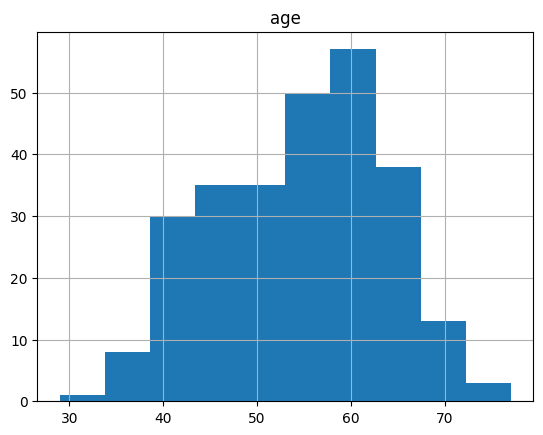

In [8]:
#histogramme de l'age
df.hist(column='age')

<Axes: ylabel='Density'>

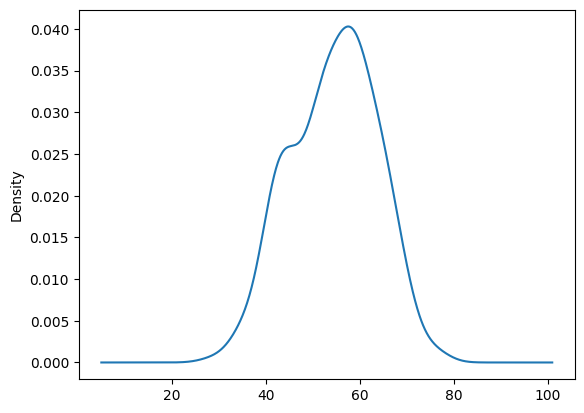

In [9]:
#density plot
df['age'].plot.kde()

array([<Axes: title={'center': 'feminin'}>,
       <Axes: title={'center': 'masculin'}>], dtype=object)

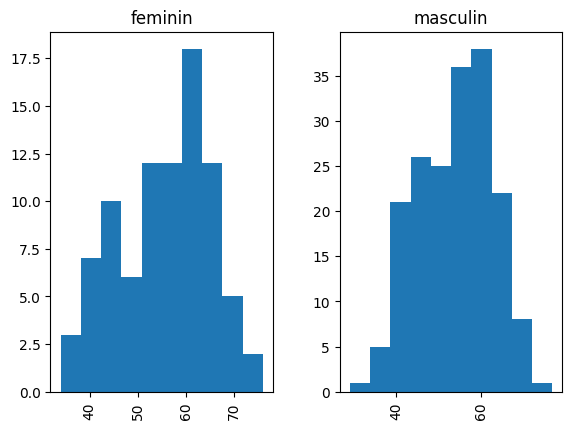

In [11]:
#histogrammes de l'age selon le sexe
df.hist(column='age',by='sexe')

<Axes: title={'center': 'age'}, xlabel='sexe'>

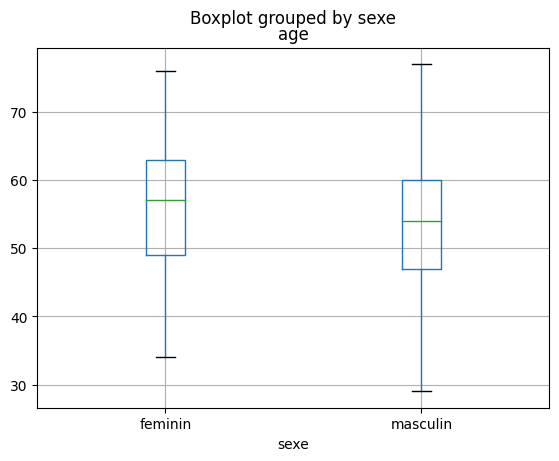

In [12]:
#comparaison des distributions avec un boxplot
df.boxplot(column='age',by='sexe')

<Axes: xlabel='age', ylabel='taux_max'>

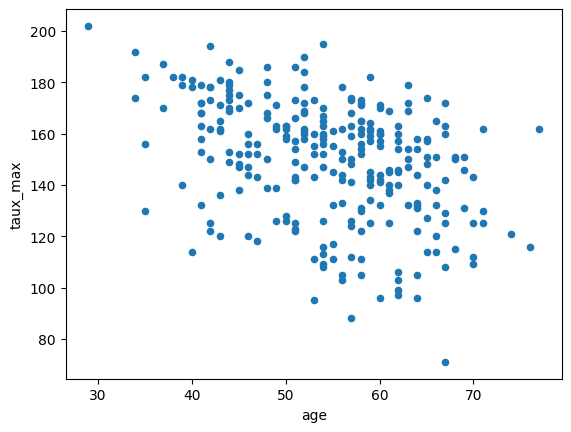

In [15]:
#scatterplot : age vs. tauxmax
df.plot.scatter(x='age',y='taux_max')

<Axes: xlabel='age', ylabel='taux_max'>

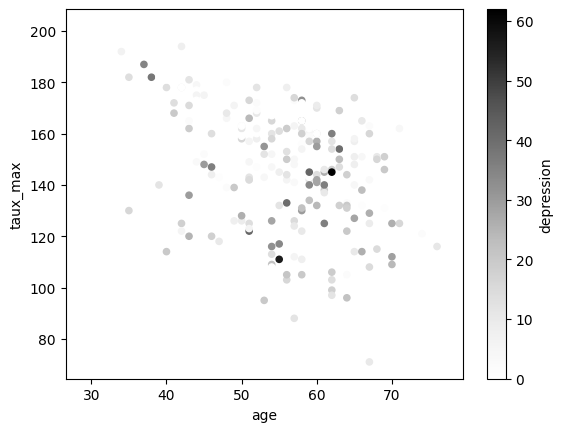

In [16]:
#scatterplot (age vs taux_max) en distinguant les points
#(nivea de gris selon les valeurs de depression)
df.plot.scatter(x='age',y='taux_max',c='depression')

<Axes: xlabel='age', ylabel='taux_max'>

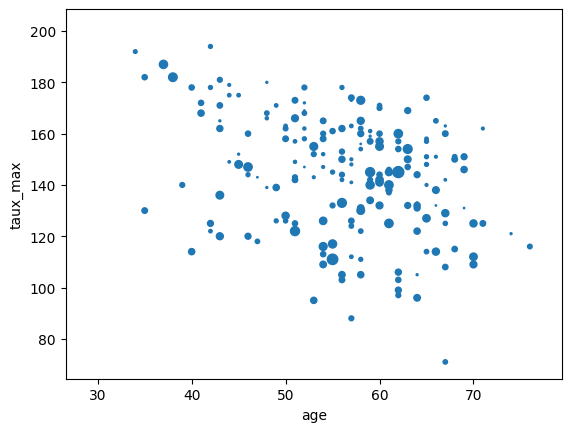

In [17]:
#scratterplot (age vs. taux_max)en distinguant les points
#(taille de points) selon les valeurs de depression
df.plot.scatter(x='age',y='taux_max',s=df['depression'])

<Axes: xlabel='age', ylabel='taux_max'>

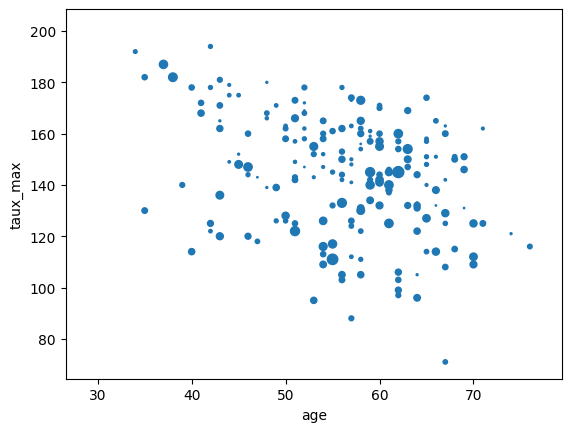

In [18]:
df.plot.scatter(x='age',y='taux_max',s=df['depression'])


<Axes: xlabel='age', ylabel='taux_max'>

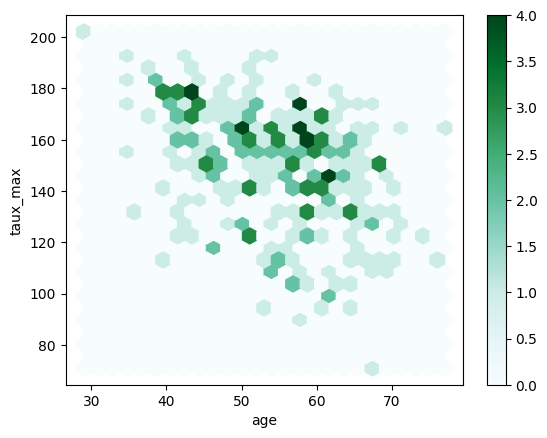

In [20]:
#grille a la carte de Kohonen permet de voir la densite de ponts
df.plot.hexbin(x='age',y='taux_max',gridsize=25)

<Axes: ylabel='sexe'>

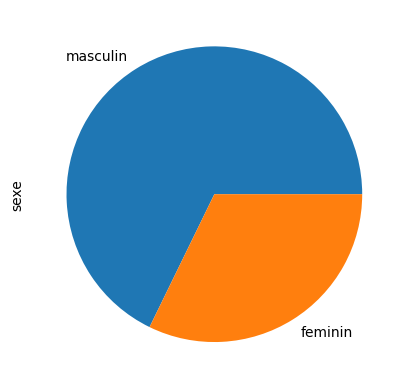

In [21]:
#diagramme a secteurs - comptage de sexe
df['sexe'].value_counts().plot.pie()

<Axes: ylabel='depression'>

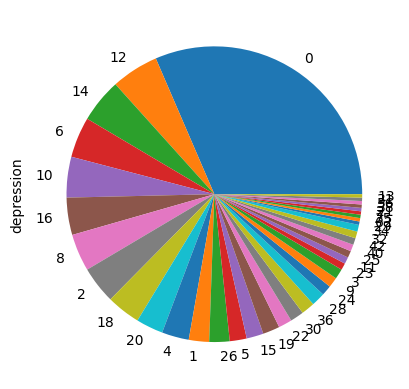

In [22]:
df['depression'].value_counts().plot.pie()